In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
import os


# Specify the file path
file_path = "./gendered_words.json"

# Read the JSON file into a DataFrame
df = pd.read_json(file_path)

# Display the DataFrame
df

,word,wordnet_senseno,gender,gender_map
0,abandoned_person,abandoned_person.n.01,n,NaN
1,abator,abator.n.01,n,NaN
2,abbe,abbe.n.01,n,NaN
3,abbess,abbess.n.01,f,"{'m': [{'parts_of_speech': '*', 'word': 'abbot..."
4,abbot,abbot.n.01,m,NaN
...,...,...,...,...
6918,zoo_keeper,zoo_keeper.n.01,n,NaN
6919,zoologist,zoologist.n.01,n,NaN
6920,zoroastrian,zoroastrian.n.01,n,NaN
6921,zulu,zulu.n.01,n,NaN


In [2]:
df = df.dropna(subset=['gender_map'])
def extract_info(row):
    for gender, details in row.items():
        return pd.Series({
            'alt_gender': gender,
            'alt_word': details[0]['word']
        })
expanded_data = df['gender_map'].apply(extract_info)
df = df.join(expanded_data)

df.drop_duplicates(subset='word', inplace=True) # dropping duplicates
df.reset_index(drop=True, inplace=True)
df.drop(columns=['gender_map'], inplace=True)
df = df[~df['word'].isin(df['alt_word'])]
df

,word,wordnet_senseno,gender,alt_gender,alt_word
0,abbess,abbess.n.01,f,m,abbot
1,able_seaman,able_seaman.n.01,m,f,able_seawoman
2,actress,actress.n.01,f,m,actor
3,adulteress,adulteress.n.01,f,m,adulterer
4,adventuress,adventuress.n.01,f,m,adventurer
...,...,...,...,...,...
497,working_girl,working_girl.n.01,f,m,working_boy
498,workman,workman.n.01,m,f,workwoman
499,yachtsman,yachtsman.n.01,m,f,yachtswoman
500,yardman,yardman.n.02,m,f,yardwoman


In [3]:
story = 'In the soft glow of dawn, the character stirred awake. The day began with a simple breakfast, enjoyed with the quiet hum of the morning news in the background. After tidying up, they stepped out into the brisk air for a daily walk, greeting familiar faces and observing the subtle changes of the season in the neighborhood park. Back home, they spent hours lost in a book, occasionally glancing out the window, lost in thought. The afternoon was spent catching up with friends over phone calls, laughing and sharing stories. As twilight fell, they prepared a favorite meal, ending the day with contentment, nestled in the comfort of familiar surroundings.'

def replace_words(story, replacement):
    # Replace "the character" with the word and "they" with the appropriate pronoun
    story = story.replace("the character", "the " + replacement)
    story = story.replace("they", "the " + replacement)
    return story


df['story'] = story.lower()
df['story_word'] = df.apply(lambda row: replace_words(row['story'], row['word']), axis=1)
df['story_alt_word'] = df.apply(lambda row: replace_words(row['story'], row['alt_word']), axis=1)
df['story_alt_word'][0]

'in the soft glow of dawn, the abbot stirred awake. the day began with a simple breakfast, enjoyed with the quiet hum of the morning news in the background. after tidying up, the abbot stepped out into the brisk air for a daily walk, greeting familiar faces and observing the subtle changes of the season in the neighborhood park. back home, the abbot spent hours lost in a book, occasionally glancing out the window, lost in thought. the afternoon was spent catching up with friends over phone calls, laughing and sharing stories. as twilight fell, the abbot prepared a favorite meal, ending the day with contentment, nestled in the comfort of familiar surroundings.'

In [4]:
long_story = '''The character wakes up to the gentle sound of rain tapping against the windowpane. It’s a soothing start to the day. After a leisurely breakfast, the character decides to spend the morning tackling a personal project that has been set aside for too long. As the rain patters on, creativity flows, and by lunchtime, there’s a satisfying sense of progress.

In the afternoon, the character heads out for a walk, umbrella in hand. The park is quiet, the usual crowds deterred by the weather, offering a peaceful retreat. Along the path, the character stops to watch a small bird flitting from tree to tree, seemingly undisturbed by the drizzle. This moment of connection with nature brings a deep sense of calm.

On the way back home, the character stops by a local café. Inside, the warm buzz of conversation and the smell of coffee create a welcoming atmosphere. The character chooses a corner table, sips a hot beverage, and reads a few chapters of a book, enjoying the blend of solitude and the murmur of community around.

The evening brings a phone call from a friend. They chat about everything and nothing, laughter mingling with more serious reflections on recent events in their lives. After the call, the character feels uplifted, reminded of the strength found in cherished relationships.

Dinner is a simple affair, cooking something comforting while listening to a favorite playlist. Afterward, the character spends some time planning the week ahead, feeling prepared and optimistic about what’s to come.

The day concludes with a small, cherished ritual: writing in a journal. The character records thoughts, feelings, and the simple joys of the day, ending with a note of gratitude. Lights out, the character falls asleep to the still-soft sound of rain, feeling content with the day’s simple, quiet pleasures.'''
def replace_words(story, replacement):
    # Replace "the character" with the word and "they" with the appropriate pronoun
    story = story.replace("the character", "the " + replacement)
    story = story.replace("they", "the " + replacement)
    return story


df['story_long'] = long_story.lower()
df['story_long_word'] = df.apply(lambda row: replace_words(row['story_long'], row['word']), axis=1)
df['story_long_alt_word'] = df.apply(lambda row: replace_words(row['story_long'], row['alt_word']), axis=1)
df['story_long_alt_word'][0]

'the abbot wakes up to the gentle sound of rain tapping against the windowpane. it’s a soothing start to the day. after a leisurely breakfast, the abbot decides to spend the morning tackling a personal project that has been set aside for too long. as the rain patters on, creativity flows, and by lunchtime, there’s a satisfying sense of progress.\n\nin the afternoon, the abbot heads out for a walk, umbrella in hand. the park is quiet, the usual crowds deterred by the weather, offering a peaceful retreat. along the path, the abbot stops to watch a small bird flitting from tree to tree, seemingly undisturbed by the drizzle. this moment of connection with nature brings a deep sense of calm.\n\non the way back home, the abbot stops by a local café. inside, the warm buzz of conversation and the smell of coffee create a welcoming atmosphere. the abbot chooses a corner table, sips a hot beverage, and reads a few chapters of a book, enjoying the blend of solitude and the murmur of community aro

In [5]:
import spacy
import spacy.cli

# Ensure that model isn't installed repeatedly
try:
    # Try to load the model to see if it's already installed
    nlp = spacy.load("en_core_web_lg")
    print("Model is successfully loaded.")
except OSError:
    # If the model is not installed, download it
    print("Model not found. Downloading now...")
    spacy.cli.download("en_core_web_lg")
    print("Model is successfully loaded.")


Model is successfully loaded.


In [6]:
df = df.copy()
df['word_vector'] = df['word'].apply(lambda x: nlp(x).vector)
df['alt_word_vector'] = df['alt_word'].apply(lambda x: nlp(x).vector)
df = df[df['word_vector'].apply(lambda x: sum(x) != 0)]
df = df[df['alt_word_vector'].apply(lambda x: sum(x) != 0)]
df_spacy = df.copy()
df = df.drop(columns=['word_vector', 'alt_word_vector'])

In [7]:
column_order = ['word', 'gender', 'word_vector', 'alt_word', 'alt_gender', 'alt_word_vector']
df_spacy = df_spacy.reindex(columns=column_order)
df_spacy.reset_index(drop=True, inplace=True)
df_spacy

,word,gender,word_vector,alt_word,alt_gender,alt_word_vector
0,abbess,f,"[-0.055308, -4.1129, 0.13099, -0.66051, -0.074...",abbot,m,"[-2.4365, -5.7415, -0.18164, 0.86196, 0.56676,..."
1,actress,f,"[-0.19423, 1.952, -1.9048, -4.79, -0.63103, 0....",actor,m,"[-2.2196, 0.825, -1.2274, -3.7514, -0.51313, 1..."
2,adulteress,f,"[0.15472, -0.64138, -1.5163, -1.8773, 0.92957,...",adulterer,m,"[-0.8278, -1.0626, -0.70223, -1.6146, 1.5188, ..."
3,adventuress,f,"[-0.70933, 0.13014, 0.046859, -3.7926, -0.8595...",adventurer,m,"[-0.05648, -0.19939, 1.4233, -4.7611, -1.5092,..."
4,alderman,m,"[-4.3969, -0.82028, -2.786, -0.4409, -0.96385,...",alderwoman,f,"[-0.84285, 0.26816, -1.1955, -0.3671, -0.48003..."
...,...,...,...,...,...,...
102,usherette,f,"[-0.72282, 0.85698, 1.6112, 1.114, 1.4241, -0....",usher,m,"[0.81333, 2.245, 2.5363, 4.8562, 0.73824, -2.1..."
103,villainess,f,"[-0.41305, 0.34085, -1.6585, -1.3554, 0.75527,...",villain,m,"[-3.1279, 1.2109, -1.2268, -3.6413, 0.48546, 2..."
104,viscountess,f,"[-0.78314, -2.4582, -2.5171, -0.62797, -0.2330...",viscount,m,"[-1.6131, -3.9941, -4.6799, 1.0634, 1.7659, -0..."
105,waitress,f,"[1.6695, -0.29016, -0.80709, 0.15619, -1.0238,...",waiter,m,"[0.74452, 0.30464, 0.936, 1.1466, -1.5493, -1...."


In [8]:
check = (df['gender'] == 'f') & (df['alt_gender'] == 'm') | (df['gender'] == 'm') & (df['alt_gender'] == 'f')
check.all()

True

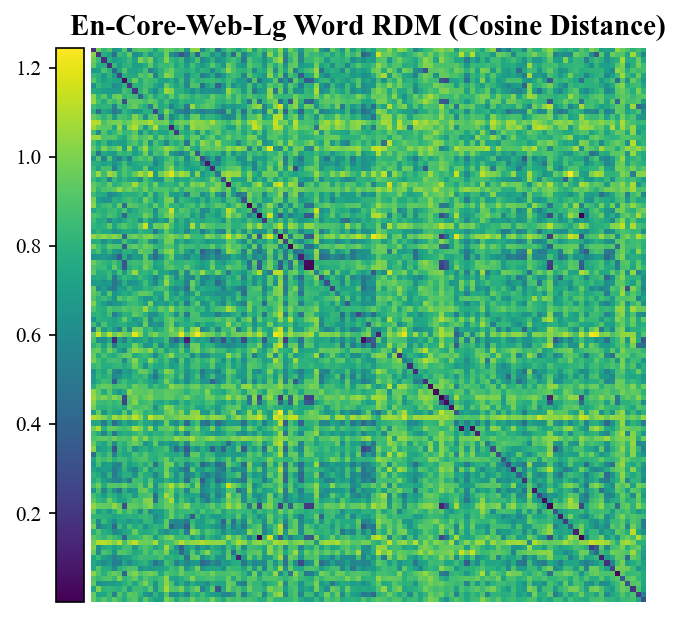

In [9]:
from scipy.spatial.distance import cosine, euclidean
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import matplotlib.pyplot as plt

def compute_rdm(df, col1, col2, metric='cosine', plot=False, title='RDM'):
    """
    Computes the Representational Dissimilarity Matrix (RDM) using the specified distance metric
    between vectors in two specified columns of a dataframe.

    Args:
        df : pandas.DataFrame
            The dataframe containing the word vectors.
        col1 : str
            The name of the column containing the first set of word vectors.
        col2 : str
            The name of the column containing the second set of word vectors.
        metric : str, optional
            The distance metric to use. Can be 'cosine' or 'euclidean'. Default is 'cosine'.
        plot : bool, optional
            If True, plots the RDM. Default is False.
        title : str, optional
            The title of the plot. Default is 'RDM'.

    Returns:
        numpy.ndarray
            The RDM matrix.
    """
    n = len(df)
    rdm = np.zeros((n, n))

    # Select the appropriate distance metric function
    if metric == 'cosine':
        distance_func = cosine
    elif metric == 'euclidean':
        distance_func = euclidean
    else:
        raise ValueError(f"Invalid metric: {metric}. Supported metrics are 'cosine' and 'euclidean'.")

    # Compute the distance for each pair
    for i in range(n):
        for j in range(n):
            rdm[i, j] = distance_func(df[col1].iloc[i], df[col2].iloc[j])

    # Optionally plot the RDM
    if plot:
        fig, ax = plt.subplots(dpi=150)  # Create a new figure and axes with 150 dpi resolution
        fig.patch.set_facecolor('none')  # Set the figure facecolor to none
        ax.set_facecolor('none')  # Set the axes facecolor to none
        im = ax.imshow(rdm, cmap='viridis')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("left", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax, orientation='vertical')
        cax.yaxis.set_ticks_position('left')
        ax.set_title(title, fontsize=14, weight='bold')
        ax.axis('off')
        plt.show()

    return rdm

rdm_spacy_words = compute_rdm(df_spacy, 'word_vector', 'alt_word_vector', plot=True, title='En-Core-Web-Lg Word RDM (Cosine Distance)', metric='cosine')


# Bert

In [10]:
from transformers import BertModel, BertTokenizer


tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

In [11]:
import torch
# Function to get the vector for a word using BERT's last hidden state
def get_word_vector(word):
    # Tokenize the word and convert to tensor
    inputs = tokenizer(word, return_tensors="pt")
    # Get the model's output
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(**inputs)
    # Get the last hidden state
    last_hidden_state = outputs.last_hidden_state
    # We take the mean of the last hidden state to represent the word vector
    word_vector = last_hidden_state.mean(dim=1).squeeze().numpy()
    return word_vector

# Apply the function to each word in the 'word' and 'alt_word' columns
df_bert = df.copy()
df_bert['word_vector'] = df_bert['word'].apply(get_word_vector)
df_bert['alt_word_vector'] = df_bert['alt_word'].apply(get_word_vector)
df_bert['story_word_vector'] = df_bert['word'].apply(get_word_vector)
df_bert['story_alt_word_vector'] = df_bert['alt_word'].apply(get_word_vector)
df_bert['story_long_word_vector'] = df_bert['word'].apply(get_word_vector)
df_bert['story_long_alt_word_vector'] = df_bert['alt_word'].apply(get_word_vector)
df_bert.head(1)

,word,wordnet_senseno,gender,alt_gender,alt_word,story,story_word,story_alt_word,story_long,story_long_word,story_long_alt_word,word_vector,alt_word_vector,story_word_vector,story_alt_word_vector,story_long_word_vector,story_long_alt_word_vector
0,abbess,abbess.n.01,f,m,abbot,"in the soft glow of dawn, the character stirre...","in the soft glow of dawn, the abbess stirred a...","in the soft glow of dawn, the abbot stirred aw...",the character wakes up to the gentle sound of ...,the abbess wakes up to the gentle sound of rai...,the abbot wakes up to the gentle sound of rain...,"[0.03386249, -0.073890425, -0.10126286, -0.018...","[-0.077743076, -0.047490407, -0.25444508, 0.09...","[0.03386249, -0.073890425, -0.10126286, -0.018...","[-0.077743076, -0.047490407, -0.25444508, 0.09...","[0.03386249, -0.073890425, -0.10126286, -0.018...","[-0.077743076, -0.047490407, -0.25444508, 0.09..."


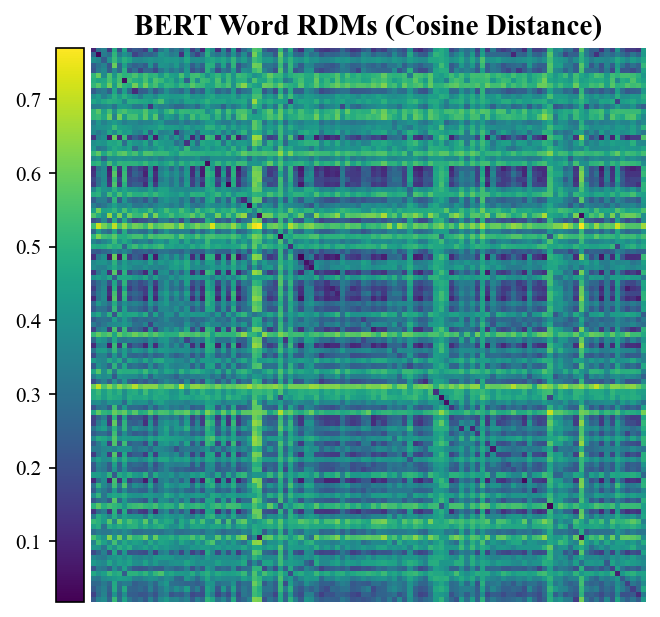

In [12]:
rdm_bert_words = compute_rdm(df_bert, 'word_vector', 'alt_word_vector', plot=True, title='BERT Word RDMs (Cosine Distance)')

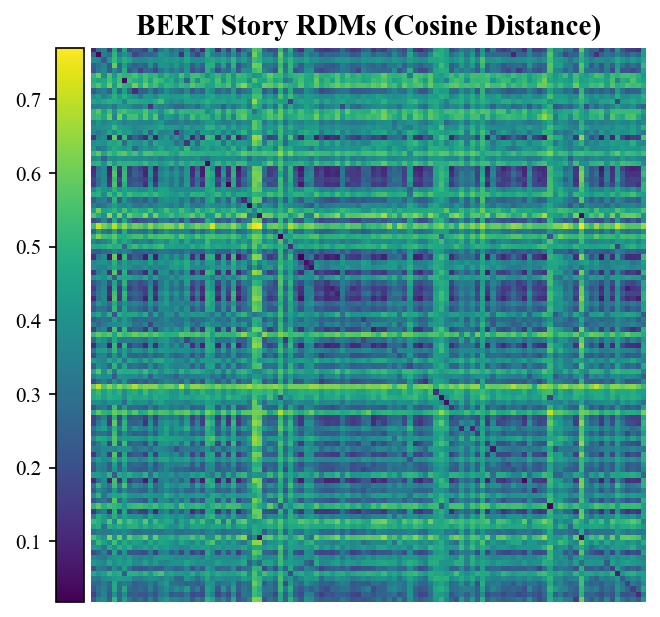

In [13]:
rdm_bert_story = compute_rdm(df_bert, 'story_word_vector', 'story_alt_word_vector', plot=True, title='BERT Story RDMs (Cosine Distance)')

In [14]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
pearson_r, p_value = pearsonr(rdm_bert_words.flatten(), rdm_bert_story.flatten())

# Print the result
print("Pearson correlation coefficient:", pearson_r)
print("p-value:", p_value)


Pearson correlation coefficient: 0.9999999999999967
p-value: 0.0


# OpenAI text-embedding-3-large

In [15]:
import os
from openai import OpenAI

client = OpenAI(api_key = key)

def generate_embedding(text): 
    MODEL = "text-embedding-3-large"
    response = client.embeddings.create(
        model=MODEL,
        input=text
    )
    
    return response.data[0].embedding

In [16]:
df_gpt = df.copy()
df_gpt['word_vector'] = df_gpt['word'].apply(generate_embedding)
df_gpt['alt_word_vector'] = df_gpt['alt_word'].apply(generate_embedding)
df_gpt['story_word_vector'] = df_gpt['word'].apply(generate_embedding)
df_gpt['story_alt_word_vector'] = df_gpt['alt_word'].apply(generate_embedding)
df_gpt['story_long_word_vector'] = df_gpt['word'].apply(generate_embedding)
df_gpt['story_long_alt_word_vector'] = df_gpt['alt_word'].apply(generate_embedding)
df_gpt.head(1)

,word,wordnet_senseno,gender,alt_gender,alt_word,story,story_word,story_alt_word,story_long,story_long_word,story_long_alt_word,word_vector,alt_word_vector,story_word_vector,story_alt_word_vector,story_long_word_vector,story_long_alt_word_vector
0,abbess,abbess.n.01,f,m,abbot,"in the soft glow of dawn, the character stirre...","in the soft glow of dawn, the abbess stirred a...","in the soft glow of dawn, the abbot stirred aw...",the character wakes up to the gentle sound of ...,the abbess wakes up to the gentle sound of rai...,the abbot wakes up to the gentle sound of rain...,"[0.007723696064203978, 0.004210446495562792, -...","[0.0014948392054066062, 0.024402126669883728, ...","[0.007723696064203978, 0.004210446495562792, -...","[0.0014948392054066062, 0.024402126669883728, ...","[0.007723696064203978, 0.004210446495562792, -...","[0.0014948392054066062, 0.024402126669883728, ..."


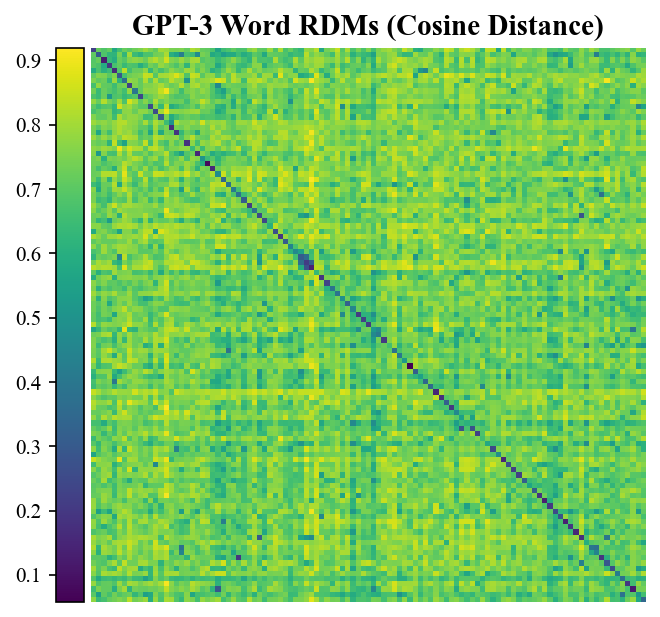

In [17]:
rdm_gpt_words = compute_rdm(df_gpt, 'word_vector', 'alt_word_vector', plot=True, title='GPT-3 Word RDMs (Cosine Distance)')

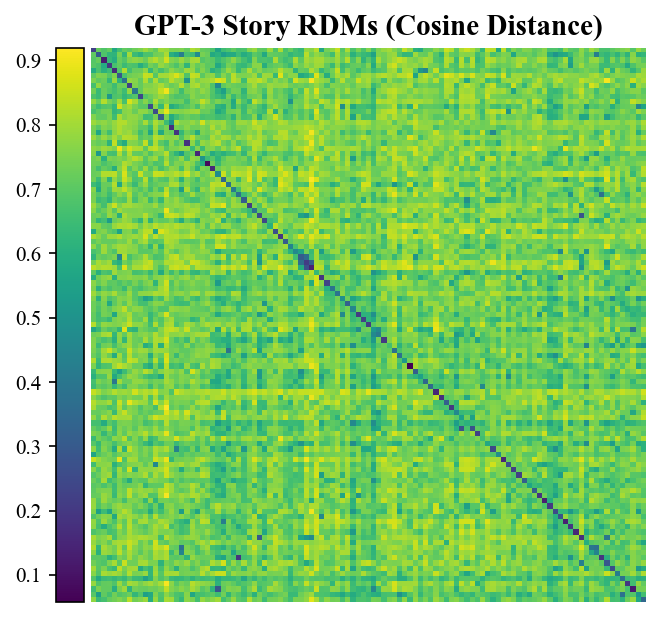

In [18]:
rdm_gpt_story = compute_rdm(df_gpt, 'story_word_vector', 'story_alt_word_vector', plot=True, title='GPT-3 Story RDMs (Cosine Distance)')

In [19]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
pearson_r, p_value = pearsonr(rdm_gpt_words.flatten(), rdm_gpt_story.flatten())

# Print the result
print("Pearson correlation coefficient:", pearson_r)
print("p-value:", p_value)

Pearson correlation coefficient: 0.9998899916680561
p-value: 0.0


In [20]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import numpy as np

def plot_rdms(rdm1, rdm2, title1, title2, correlation_type='spearman', model_name='Model'):
    # Create a polynomial function for the trendline
    coefficients = np.polyfit(rdm1.flatten(), rdm2.flatten(), 1)
    poly = np.poly1d(coefficients)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=150)
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none

    # Plot RDM1
    im1 = axs[0].imshow(rdm1, cmap='viridis')
    axs[0].set_title(title1, fontsize=14, fontweight='bold')
    axs[0].set_xticks([])
    axs[0].set_yticks([])

    # Plot scatterplot
    axs[1].scatter(rdm1.flatten(), rdm2.flatten())
    axs[1].plot(rdm1.flatten(), poly(rdm1.flatten()), color='red')
    axs[1].set_xlabel(f'{model_name} Dissimilarity', fontweight='bold')
    axs[1].set_ylabel('spaCy Dissimilarity', fontweight='bold')
    axs[1].spines['right'].set_visible(False)
    axs[1].spines['top'].set_visible(False)
    axs[1].set_title(title2, fontsize=14, fontweight='bold')

    # Calculate correlation and p-value based on the specified correlation type
    if correlation_type == 'pearson':
        correlation, p_value = pearsonr(rdm1.flatten(), rdm2.flatten())
        correlation_label = 'Pearson r'
    elif correlation_type == 'spearman':
        correlation, p_value = spearmanr(rdm1.flatten(), rdm2.flatten())
        correlation_label = 'Spearman r'
    else:
        raise ValueError(f"Invalid correlation type: {correlation_type}. Supported types are 'pearson' and 'spearman'.")

    # Add text label for correlation value and p-value
    axs[1].text(0.65, 0.02, f"{correlation_label} = {correlation:.2f}\nP-value = {p_value:.2f}", transform=axs[1].transAxes, fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

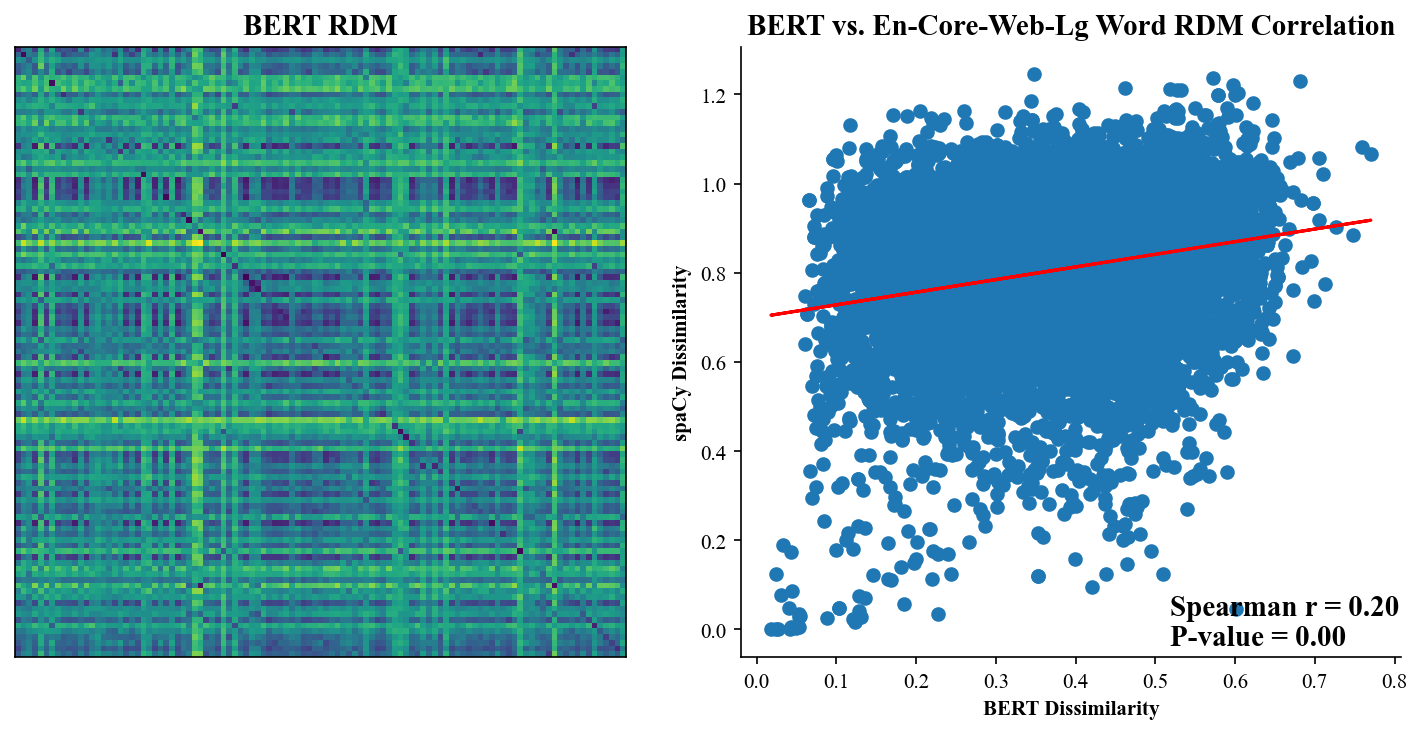

In [21]:
plot_rdms(rdm_bert_words, rdm_spacy_words, 'BERT RDM', 'BERT vs. En-Core-Web-Lg Word RDM Correlation', model_name='BERT')

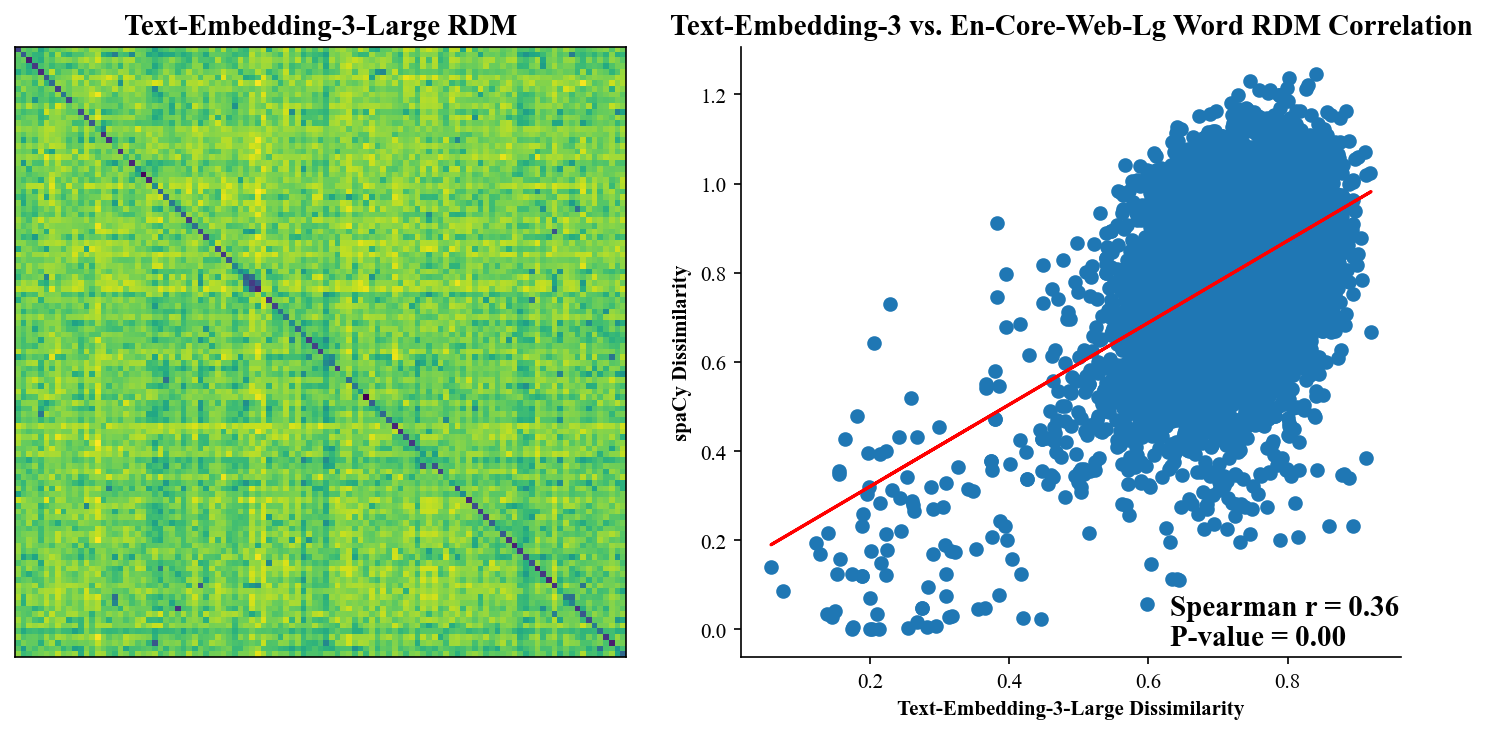

In [22]:
plot_rdms(rdm_gpt_words, rdm_spacy_words, 'Text-Embedding-3-Large RDM', 'Text-Embedding-3 vs. En-Core-Web-Lg Word RDM Correlation', model_name='Text-Embedding-3-Large')

# Ploting

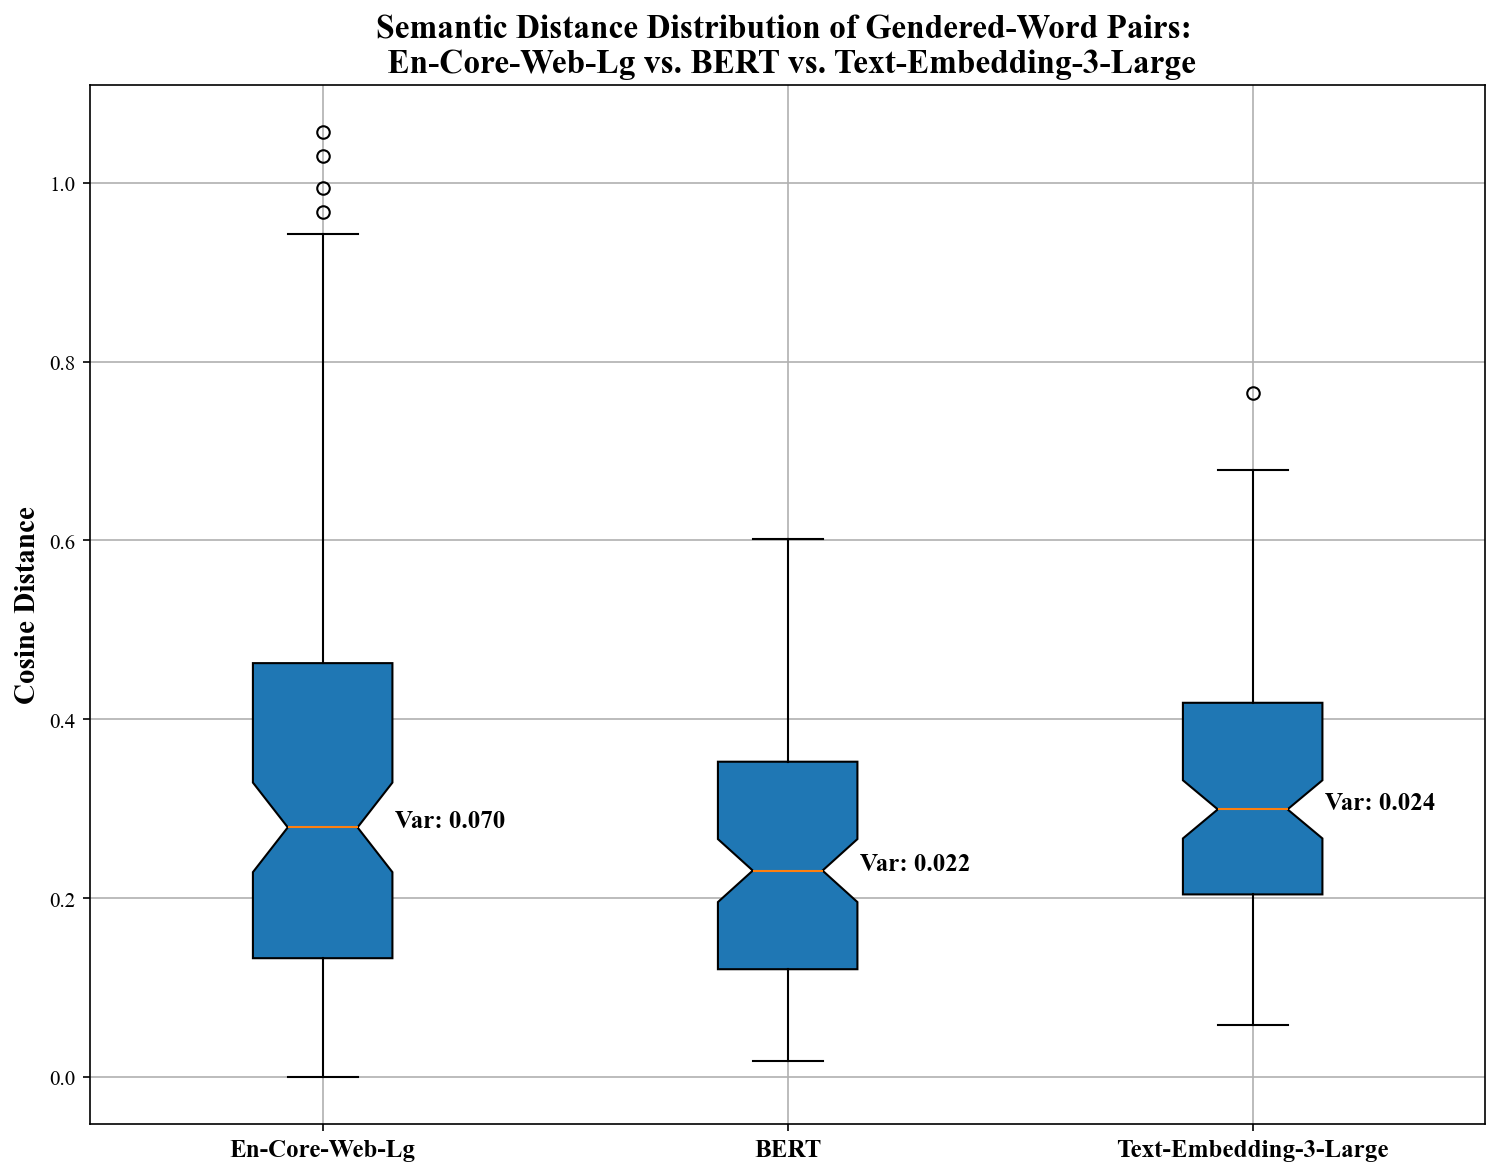

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine

def plot_distance_distribution(df1, df2, df3, title):
    """
    Plots the box plot of cosine distances for three different DataFrames, each containing vectors 
    in 'word_vector' and 'alt_word_vector' columns, side by side for comparison, and annotates 
    each box plot with its variance. The plot is created with a resolution of 150 DPI.

    Args:
    df1, df2, df3 : pandas.DataFrame
        DataFrames containing the word vectors in 'word_vector' and 'alt_word_vector' columns.
    title : str
        Title of the plot.
    """
    # Function to calculate cosine distances for a given DataFrame
    def calculate_distances(df):
        return [cosine(df['word_vector'].iloc[i], df['alt_word_vector'].iloc[i]) for i in range(len(df))]
    
    # Calculating distances for each DataFrame
    distances1 = calculate_distances(df1)
    distances2 = calculate_distances(df2)
    distances3 = calculate_distances(df3)

    # Calculating variance for each DataFrame
    variances = [np.var(distances1), np.var(distances2), np.var(distances3)]

    # Creating the plot
    plt.figure(figsize=(12, 9), dpi=150, facecolor='w', edgecolor='w')
    box = plt.boxplot([distances1, distances2, distances3], vert=True, patch_artist=True, notch=True,
                      labels=['En-Core-Web-Lg', 'BERT', 'Text-Embedding-3-Large'])
    plt.title(title, fontsize=16, weight='bold')
    plt.xticks(fontsize=12, fontweight='bold')
    plt.ylabel('Cosine Distance', fontsize=14, weight='bold')
    plt.grid(True)
    
    # Annotating variance above each boxplot
    for i, (line, var) in enumerate(zip(box['medians'], variances), 1):
        x, y = line.get_xydata()[1] # top of median line
        plt.text(x+0.2, y, f'Var: {var:.3f}', horizontalalignment='center', fontsize=12, color='black', weight='bold')

    plt.show()


plot_distance_distribution(df_spacy, df_bert, df_gpt, 'Semantic Distance Distribution of Gendered-Word Pairs: \n En-Core-Web-Lg vs. BERT vs. Text-Embedding-3-Large')

In [28]:
df_bert.head(1)

,word,wordnet_senseno,gender,alt_gender,alt_word,story,story_word,story_alt_word,story_long,story_long_word,story_long_alt_word,word_vector,alt_word_vector,story_word_vector,story_alt_word_vector,story_long_word_vector,story_long_alt_word_vector
0,abbess,abbess.n.01,f,m,abbot,"in the soft glow of dawn, the character stirre...","in the soft glow of dawn, the abbess stirred a...","in the soft glow of dawn, the abbot stirred aw...",the character wakes up to the gentle sound of ...,the abbess wakes up to the gentle sound of rai...,the abbot wakes up to the gentle sound of rain...,"[0.03386249, -0.073890425, -0.10126286, -0.018...","[-0.077743076, -0.047490407, -0.25444508, 0.09...","[0.03386249, -0.073890425, -0.10126286, -0.018...","[-0.077743076, -0.047490407, -0.25444508, 0.09...","[0.03386249, -0.073890425, -0.10126286, -0.018...","[-0.077743076, -0.047490407, -0.25444508, 0.09..."


In [32]:
rdm_bert_story_long = compute_rdm(df_bert, 'story_long_word_vector', 'story_long_alt_word_vector', plot=False, title='GPT-3 Word RDMs (Cosine Distance)')
rdm_gpt_story_long = compute_rdm(df_gpt, 'story_long_word_vector', 'story_long_alt_word_vector', plot=False, title='GPT-3 Word RDMs (Cosine Distance)')

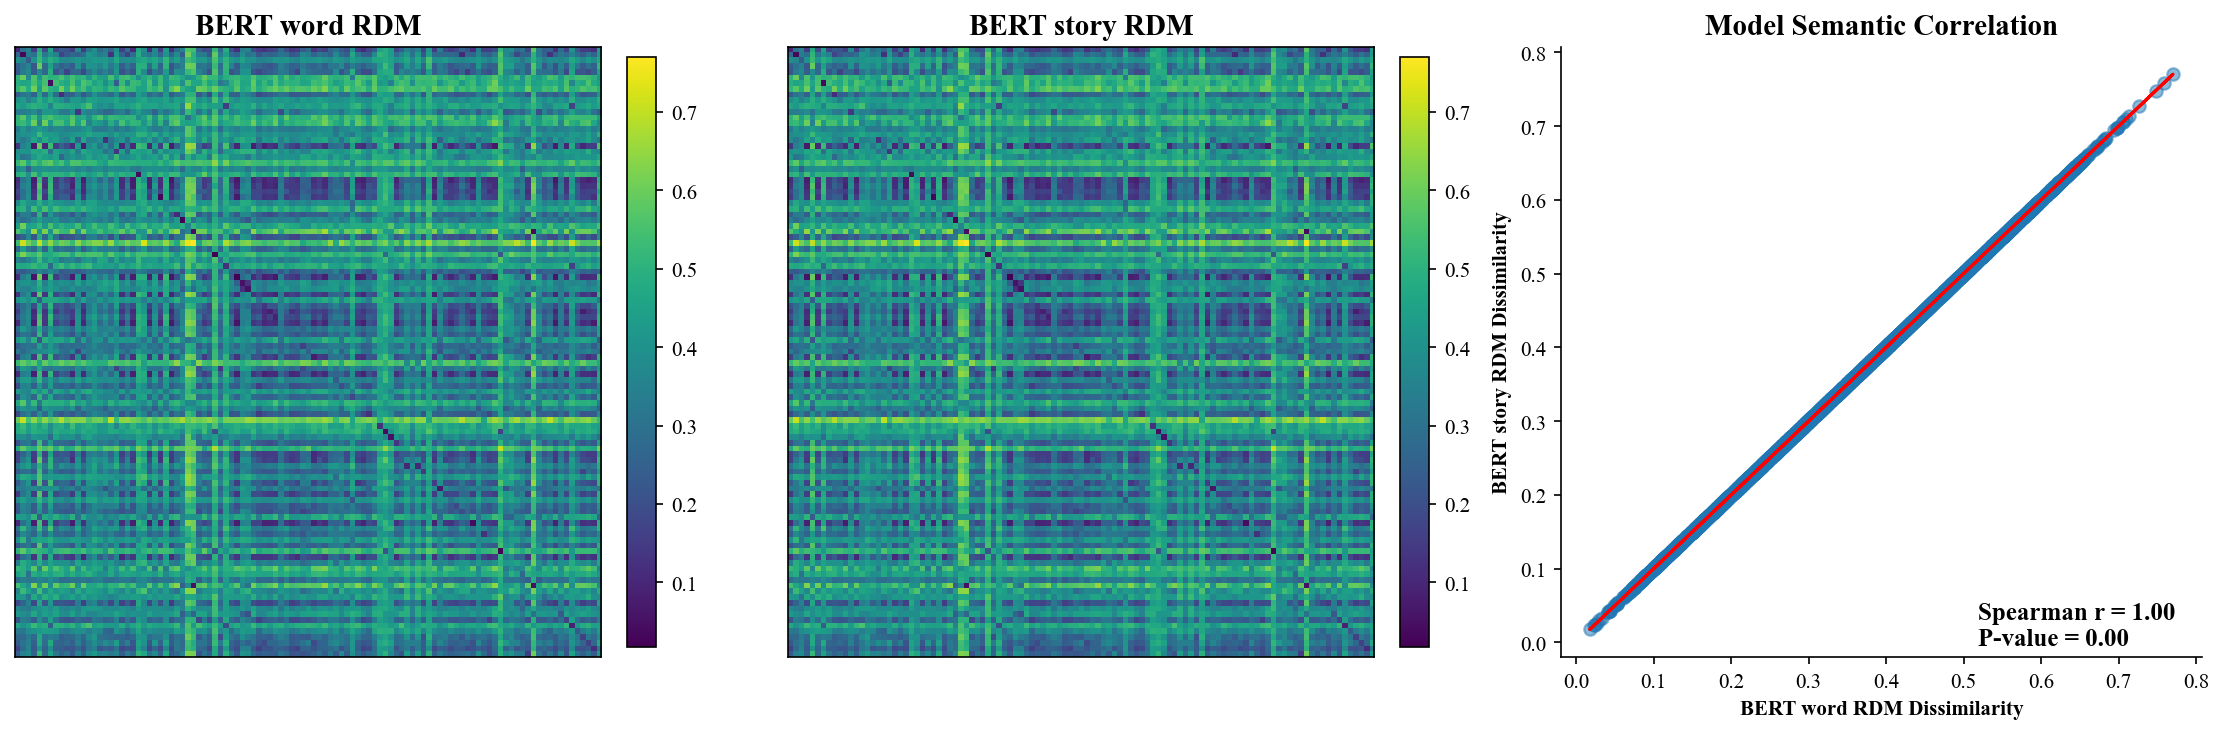

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

def plot_rdms(rdm1, rdm2, title1, title2, correlation_type='spearman', model_name='Model'):
    # Create a polynomial function for the trendline
    coefficients = np.polyfit(rdm1.flatten(), rdm2.flatten(), 1)
    poly = np.poly1d(coefficients)

    # Setting up a subplot grid with 1 row and 3 columns
    fig, axs = plt.subplots(1, 3, figsize=(15, 5), dpi=150)
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none

    # Plot RDM1
    im1 = axs[0].imshow(rdm1, cmap='viridis', aspect='auto')
    axs[0].set_title(title1, fontsize=14, fontweight='bold')
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    fig.colorbar(im1, ax=axs[0], fraction=0.046, pad=0.04)

    # Plot RDM2
    im2 = axs[1].imshow(rdm2, cmap='viridis', aspect='auto')
    axs[1].set_title(title2, fontsize=14, fontweight='bold')
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    fig.colorbar(im2, ax=axs[1], fraction=0.046, pad=0.04)

    # Plot scatterplot for correlations
    axs[2].scatter(rdm1.flatten(), rdm2.flatten(), alpha=0.5)
    axs[2].plot(rdm1.flatten(), poly(rdm1.flatten()), color='red')  # trendline
    axs[2].set_xlabel(f'{title1} Dissimilarity', fontweight='bold')
    axs[2].set_ylabel(f'{title2} Dissimilarity', fontweight='bold')
    axs[2].spines['right'].set_visible(False)
    axs[2].spines['top'].set_visible(False)
    axs[2].set_title('Model Semantic Correlation', fontsize=14, fontweight='bold')

    # Calculate correlation and p-value based on the specified correlation type
    if correlation_type == 'pearson':
        correlation, p_value = pearsonr(rdm1.flatten(), rdm2.flatten())
        correlation_label = 'Pearson r'
    elif correlation_type == 'spearman':
        correlation, p_value = spearmanr(rdm1.flatten(), rdm2.flatten())
        correlation_label = 'Spearman r'
    else:
        raise ValueError(f"Invalid correlation type: {correlation_type}. Supported types are 'pearson' and 'spearman'.")

    # Add text label for correlation value and p-value
    axs[2].text(0.65, 0.02, f"{correlation_label} = {correlation:.2f}\nP-value = {p_value:.2f}", transform=axs[2].transAxes, fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

plot_rdms(rdm_bert_words, rdm_bert_story_long, 'BERT word RDM', 'BERT story RDM', model_name='BERT')

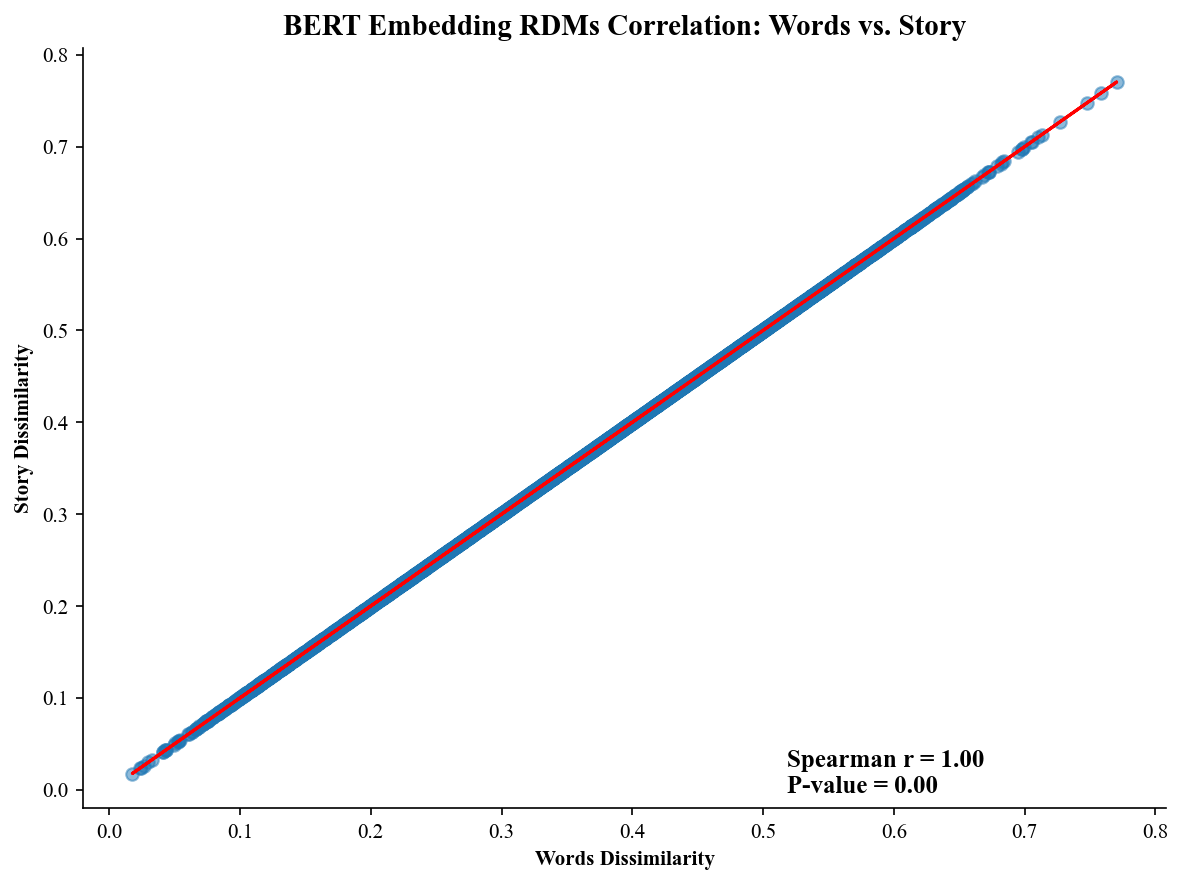

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, pearsonr

def plot_corr(rdm1, rdm2, model1='Model1', model2='Model2', correlation_type='spearman', model_name='Model'):
    # Create a polynomial function for the trendline
    coefficients = np.polyfit(rdm1.flatten(), rdm2.flatten(), 1)
    poly = np.poly1d(coefficients)

    # Create a figure and a single subplot
    fig, ax = plt.subplots(figsize=(8, 6), dpi=150)
    fig.patch.set_facecolor('none')  # Set the figure facecolor to none

    # Plot scatterplot for correlations
    ax.scatter(rdm1.flatten(), rdm2.flatten(), alpha=0.5)
    ax.plot(rdm1.flatten(), poly(rdm1.flatten()), color='red')  # trendline
    ax.set_xlabel(f'{model1} Dissimilarity', fontweight='bold')
    ax.set_ylabel(f'{model2} Dissimilarity', fontweight='bold')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_title(f'{model_name} Embedding RDMs Correlation: {model1} vs. {model2}', fontsize=14, fontweight='bold')

    # Calculate correlation and p-value based on the specified correlation type
    if correlation_type == 'pearson':
        correlation, p_value = pearsonr(rdm1.flatten(), rdm2.flatten())
        correlation_label = 'Pearson r'
    elif correlation_type == 'spearman':
        correlation, p_value = spearmanr(rdm1.flatten(), rdm2.flatten())
        correlation_label = 'Spearman r'
    else:
        raise ValueError(f"Invalid correlation type: {correlation_type}. Supported types are 'pearson' and 'spearman'.")

    # Add text label for correlation value and p-value
    ax.text(0.65, 0.02, f"{correlation_label} = {correlation:.2f}\nP-value = {p_value:.2f}", transform=ax.transAxes, fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

plot_corr(rdm_bert_words, rdm_bert_story, model1='Words', model2='Story', correlation_type='spearman', model_name = 'BERT')

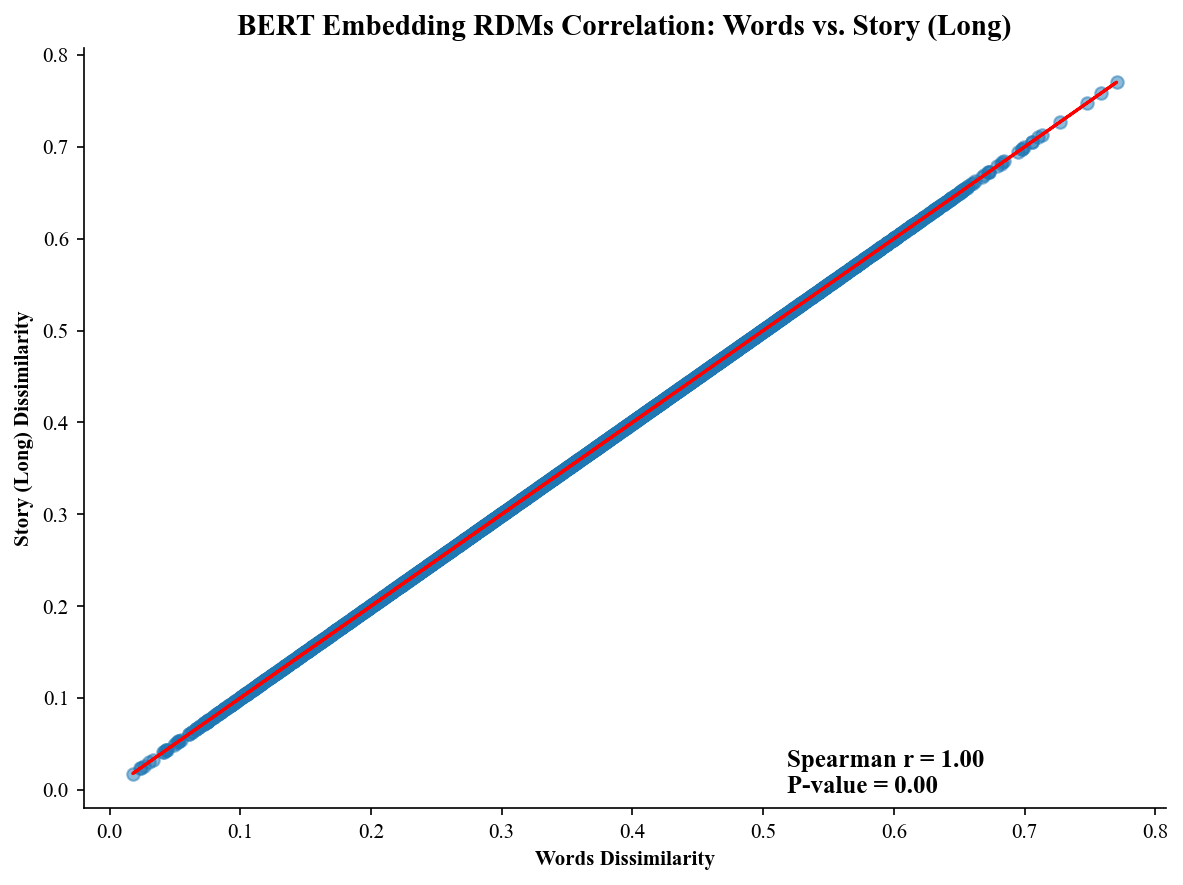

In [46]:
plot_corr(rdm_bert_words, rdm_bert_story_long, model1='Words', model2='Story (Long)', correlation_type='spearman', model_name = 'BERT')

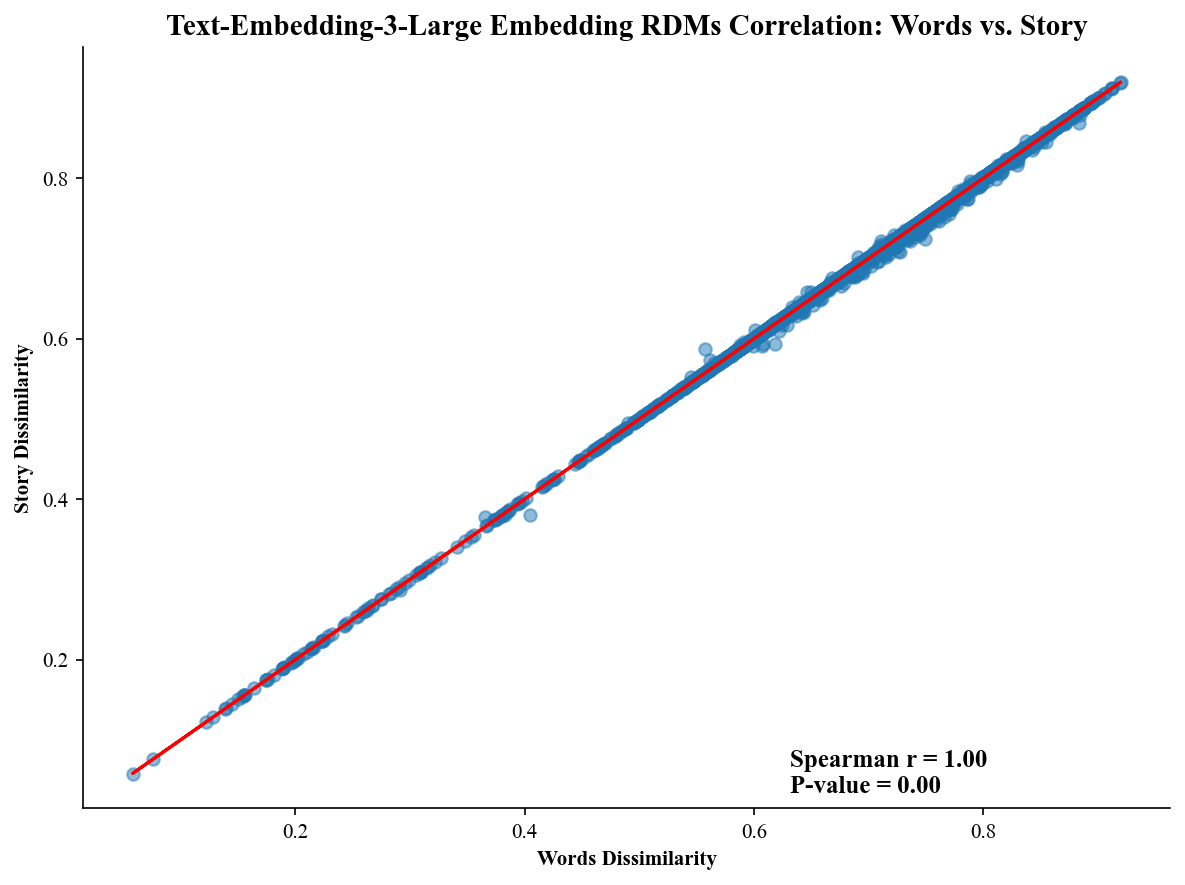

In [47]:
plot_corr(rdm_gpt_words, rdm_gpt_story, model1='Words', model2='Story', correlation_type='spearman', model_name = 'Text-Embedding-3-Large')

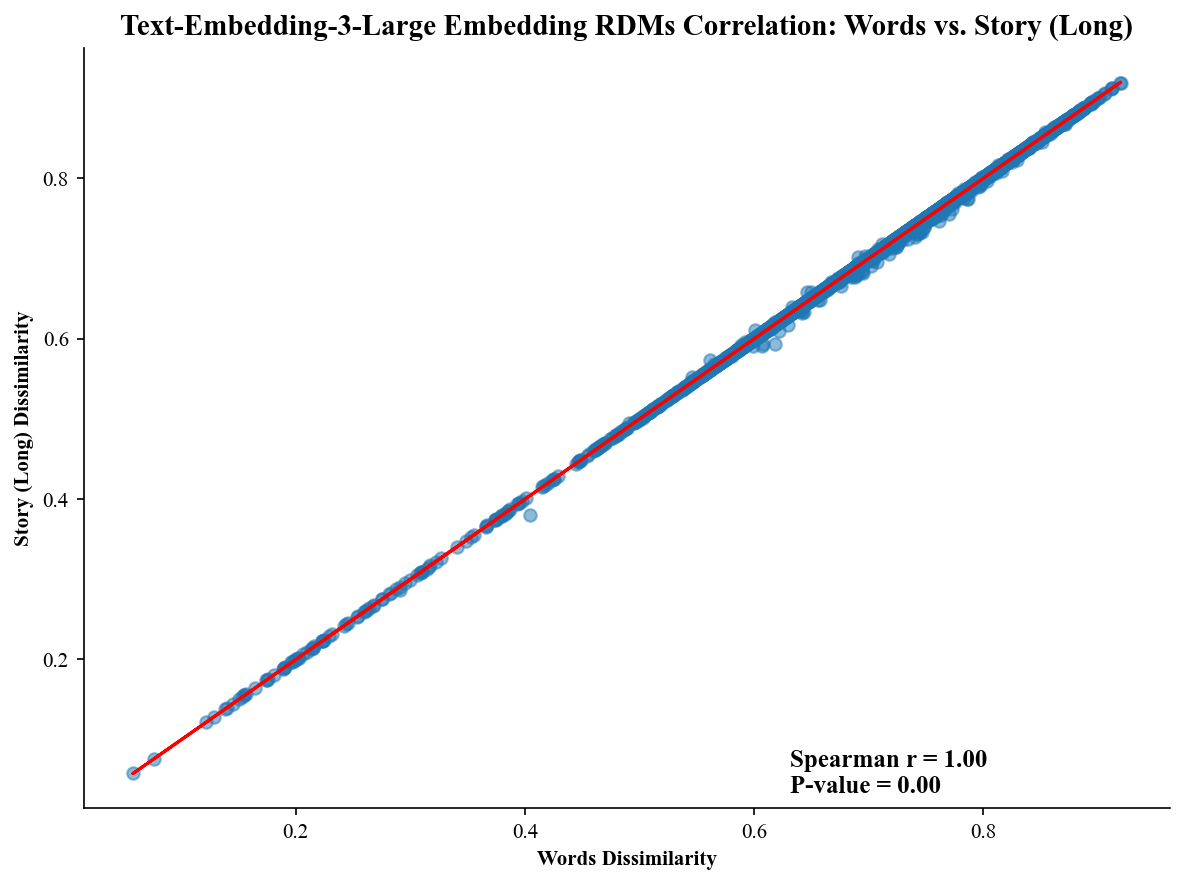

In [48]:
plot_corr(rdm_gpt_words, rdm_gpt_story_long, model1='Words', model2='Story (Long)', correlation_type='spearman', model_name = 'Text-Embedding-3-Large')